# Exploratory Data Analisys (EDA)

Essa parte da análise busca entender quais fatores podem auxiliar em um ROI elevado, especialmente para situações de baixo risco em que a produtora não ficará muito exposta
A ideia é usar o ROI e não o Gross já que o ROI evita viéses causados pela inflação ou mesmo uma interpretação errônea de que uma arrecadação alta significa um sucesso na parte de negócios, já que o budget_log_log_log_log_log pode ter sido tão alto quanto, logo é preferível entender como lcrar mais em porporção do que simplesmente o faturamento bruto

## 1 - Bibliotecas e Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
import wordcloud
from wordcloud import WordCloud
from scipy.stats import ttest_ind, mannwhitneyu
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.api as sm


df = pd.read_csv('df_EDA.csv')

In [33]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Released_Month,Released_Day,Certificate,Runtime,Genre,IMDB_Rating,Overview,...,Star4,No_of_Votes,Gross,release_date,budget,ROI,Gross_log,No_of_Votes_log,budget_log,ROI_log
0,1,The Godfather,1972.0,3.0,14.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,...,Diane Keaton,1620367,134966411.0,1972-03-14,6000000.0,21.494402,18.720537,14.298164,15.607270,3.113266
1,2,The Dark Knight,2008.0,7.0,16.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,...,Michael Caine,2303232,534858444.0,2008-07-16,185000000.0,1.891127,20.097513,14.649824,19.035866,1.061646
2,3,The Godfather: Part II,1974.0,NaN,NaN,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,...,Diane Keaton,1129952,57300000.0,NaN,1300000.0,43.076923,17.863811,13.937687,14.077876,3.785936
3,4,12 Angry Men,1957.0,4.0,10.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,...,John Fiedler,689845,4360000.0,1957-04-10,350000.0,11.457143,15.287983,13.444224,12.765691,2.522294
4,5,The Lord of the Rings: The Return of the King,2003.0,12.0,17.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,...,Orlando Bloom,1642758,377845905.0,2003-12-17,94000000.0,3.019637,19.749997,14.311888,18.358805,1.391192


## 2 - Análise Temporal

Primeiro vou verificar se existem meses com maior e menor arrecadação e ROI. Imagino que os meses com mais arrecadação sejam nas férias escolares (julho, dezembro e janeiro)

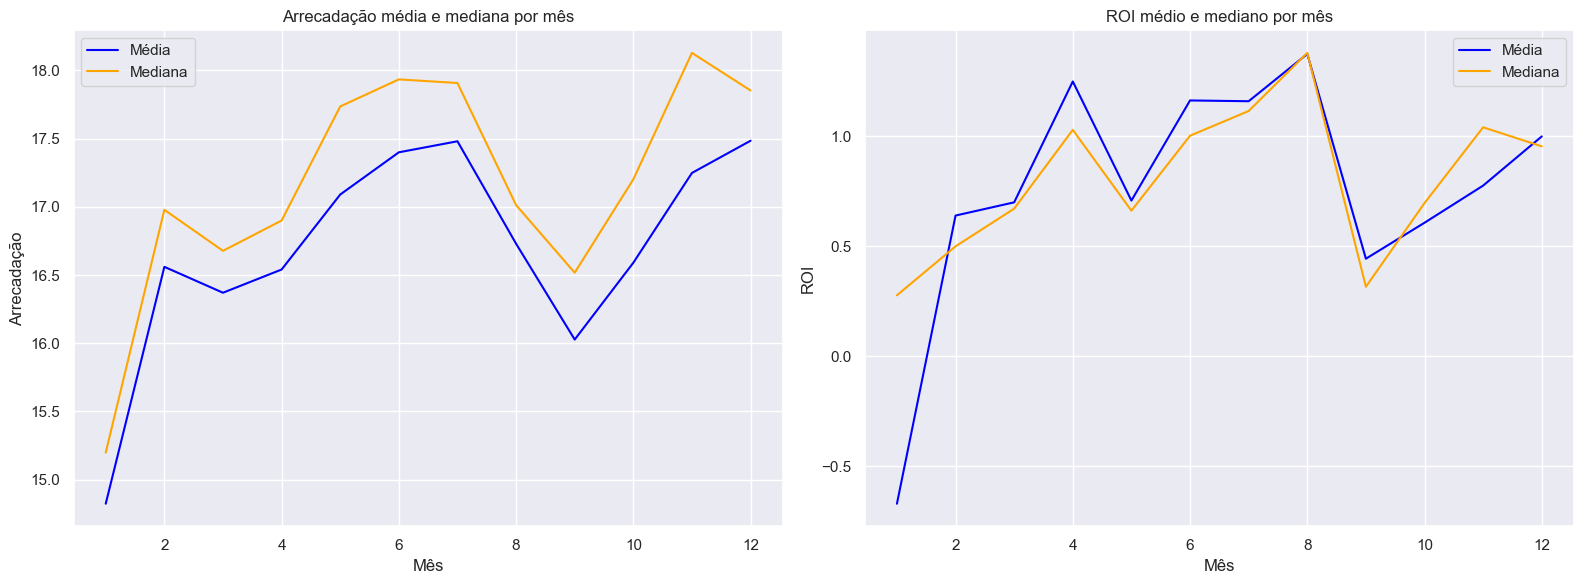

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6)) 

#Gross
axes[0].plot(gross_mes.index, gross_mes['mean'], label='Média', color='blue')
axes[0].plot(gross_mes.index, gross_mes['median'], label='Mediana', color='orange')
axes[0].set_title("Arrecadação média e mediana por mês")
axes[0].set_xlabel("Mês")
axes[0].set_ylabel("Arrecadação")
axes[0].legend()

#ROI
axes[1].plot(ROI_mes.index, ROI_mes['mean'], label='Média', color='blue')
axes[1].plot(ROI_mes.index, ROI_mes['median'], label='Mediana', color='orange')
axes[1].set_title("ROI médio e mediano por mês")
axes[1].set_xlabel("Mês")
axes[1].set_ylabel("ROI")
axes[1].legend()

plt.tight_layout()  
plt.show()

Os gráficos mostram que janeiro é o mês com os piores resultados, em média. Já os meses de junho, julho, novembro e dezembro possuem os melhores resultados, sendo sazonalidades em que valem mais a pena lançar o filme.
Agora observando quais semanas possuem os melhores resultados

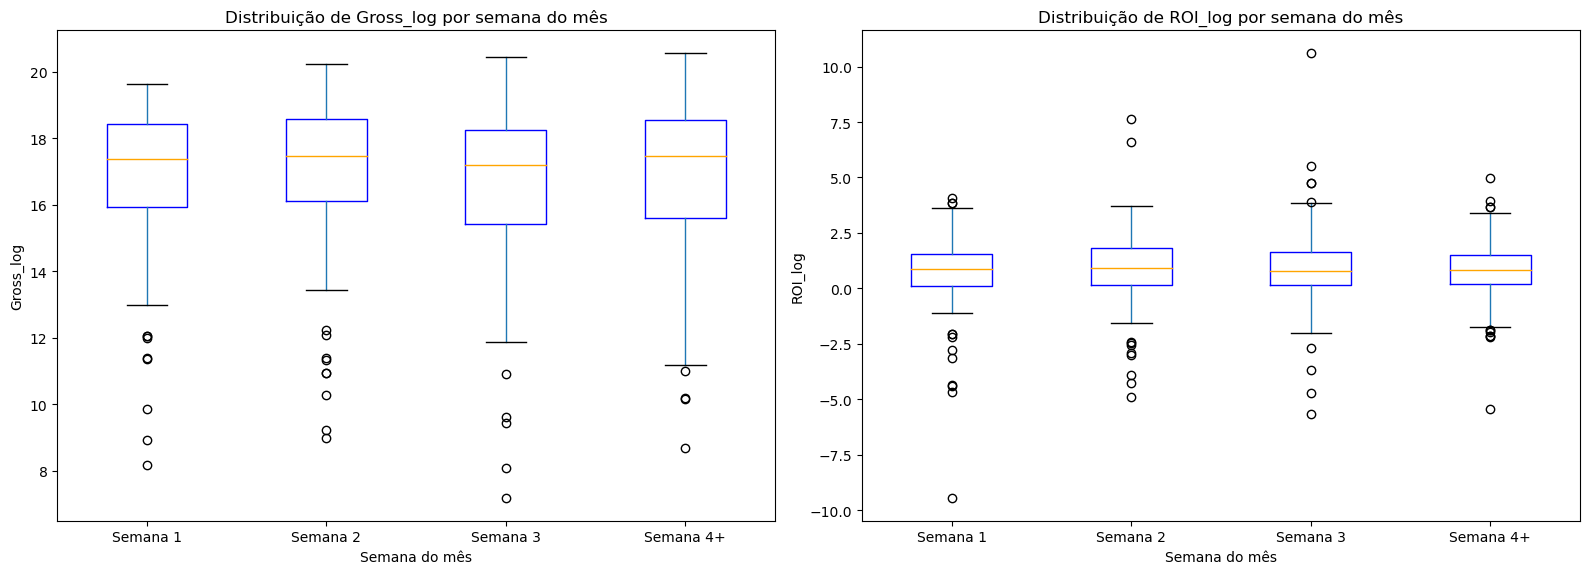

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

df.boxplot(column='Gross_log', by='semana_mes', ax=axes[0], grid=False,
           boxprops=dict(color='blue'), medianprops=dict(color='orange'))
axes[0].set_title("Distribuição da Arrecadação por semana do mês")
axes[0].set_xlabel("Semana do mês")
axes[0].set_ylabel("Gross_log")

df.boxplot(column='ROI_log', by='semana_mes', ax=axes[1], grid=False,
           boxprops=dict(color='blue'), medianprops=dict(color='orange'))
axes[1].set_title("Distribuição do ROI por semana do mês")
axes[1].set_xlabel("Semana do mês")
axes[1].set_ylabel("ROI_log")

plt.suptitle("")  
plt.tight_layout()
plt.show()

Não aparenta ter muita diferença entre as semanas, no entanto existem outliers que provavelmente foram criados em épocas mais propícias para o lançamento, por exemplo em uma semana com feriado universal ou feriadão

## 3 - Análise de Gêneros

Vou criar uma variável chamada Main Genre, que vai levar em conta apenas o primeiro gênero que aparece na coluna de gêneros, assim evitando problemas de dupla contagem em gêneros que aparecem mais vezes que outros mas não são os principais

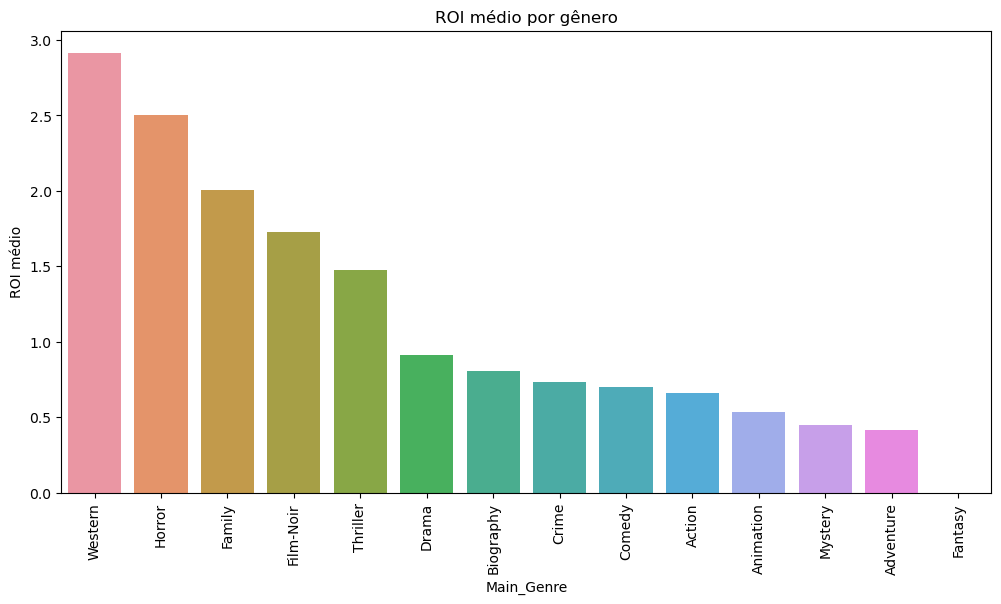

In [27]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]

profit_by_genre = df.groupby('Main_Genre')['ROI_log'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=profit_by_genre.index, y=profit_by_genre.values)
plt.xticks(rotation=90)
plt.title("ROI médio por gênero")
plt.ylabel("ROI médio")
plt.show()

O gráfico mostra que o ROI tende a ser maior em gêneros que precisam de um baixo investimento (Horror, Western e Family), representando inclusive um baixo risco.
Vou fazer um recorte temporal para observar se algum desses três gêneros se destaca em décadas mais recentes

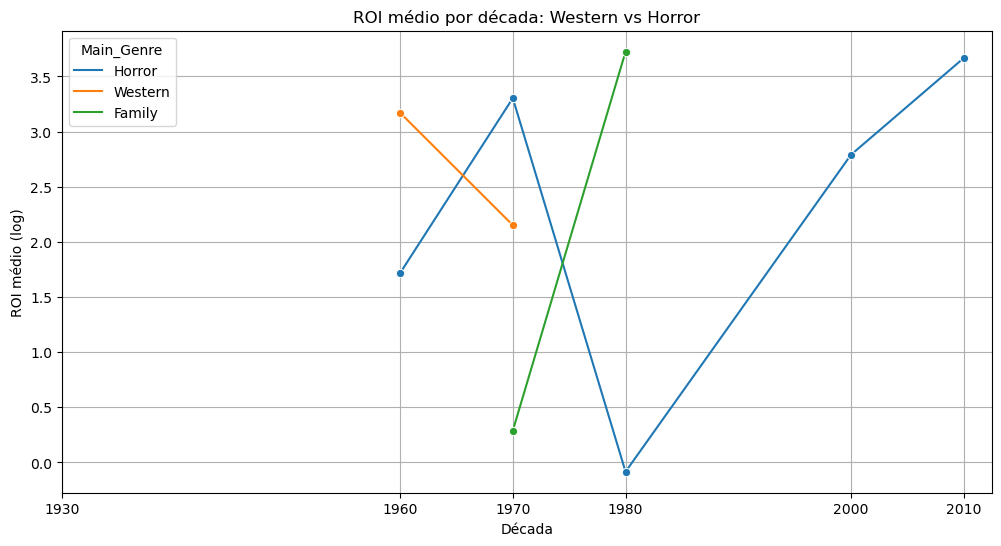

In [33]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]


df_filtered = df[df['Main_Genre'].isin(['Western', 'Horror', 'Family'])].copy()

df_filtered['Decade'] = (df_filtered['Released_Year'] // 10 * 10).astype(int)

roi_by_decade = df_filtered.groupby(['Decade', 'Main_Genre'])['ROI_log'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=roi_by_decade, x='Decade', y='ROI_log', hue='Main_Genre', marker='o')
plt.title("ROI médio por década: Western vs Horror")
plt.ylabel("ROI médio (log)")
plt.xlabel("Década")
plt.xticks(roi_by_decade['Decade'].unique())
plt.grid(True)
plt.show()

Aqui é possível observar que Terror é um gênero que consefuiu se manter oa longo das décadas, enquanto westerns e filmes familiares foram sumindo
Vou tuilizar um boxplor para ver a distribuição dos outliers nesses três gêneros

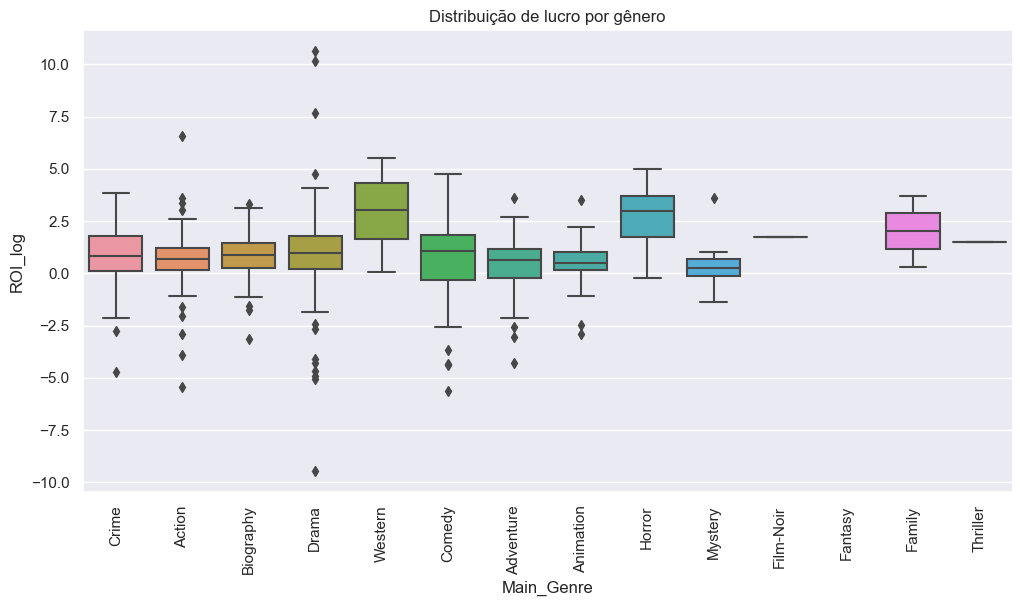

In [ ]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]

plt.figure(figsize=(12,6))
sns.boxplot(x='Main_Genre', y='ROI_log', data=df)
plt.xticks(rotation=90)
plt.title("Distribuição de ROI por gênero")
plt.show()

Os três gêneros são bem consistentes, os demais mesmo com o ROI passando pela transformação logarítimica, tem problemas com outliers pra baixo

## 4 - Variáveis de Sucesso

### 4.1 -  Duração VS ROI

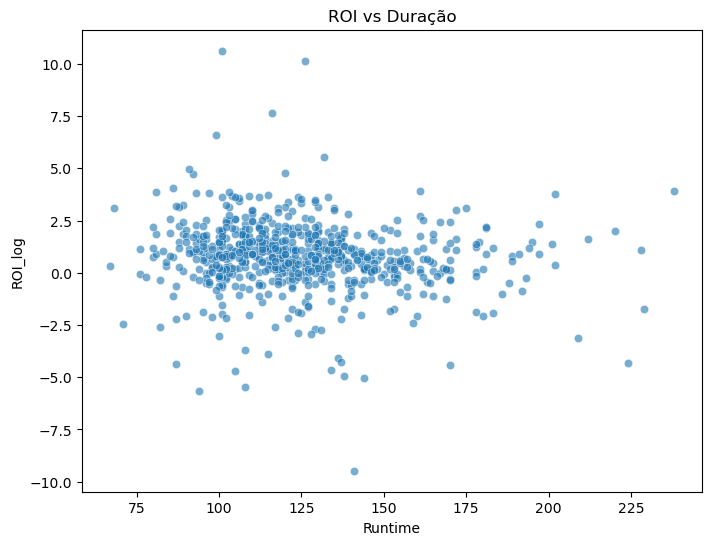

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Runtime', y='ROI_log', data=df, alpha=0.6)
plt.title("ROI vs Duração")
plt.show()

Não parece haver uma relação muito clara entre a duração do filme e o seu ROI. Mas podemos observar que a maioria dos filmes tem entre 100 e 150 minutos de duração e nessa faixa existem alguns outliers positivos, ou seja, alguns filmes com ROI bastante elevado

Vou fazer um teste de hipótese com correlação de Pearson:
- H<sub>0</sub>
: Não existe correlação entre a duração do filme  e o ROI
- H<sub>1</sub>: Existe correlação entre a duração do filme e ROI logarítmico


In [46]:
mask = df['Runtime'].notna() & df['ROI_log'].notna() & np.isfinite(df['Runtime']) & np.isfinite(df['ROI_log'])
runtime_clean = df.loc[mask, 'Runtime']
roi_clean = df.loc[mask, 'ROI_log']

corr, p_val = pearsonr(runtime_clean, roi_clean)
print(f"Pearson correlation: {corr:.3f}, p-value: {p_val:.3e}")

Pearson correlation: -0.126, p-value: 1.114e-03


Com o p-valor < 0.05, temos que a hipótese nula foi rejeitada, logo existe uma relação entre a duração e o ROI
O coeficiente é -0.0126, o que indica que existe uma baixa correlação negativa, quanto maior o filme, menor o ROI
Acredito que isso seja causado pelo fato de que, no geral, pagamos o mesmo em ingressos independente da duração do filme. Um filme de 90 minutos pode ser exibido duas vezes no mesmo período que um filme de 3 horas, além dos obvios custos de produção e o alcance em um público ainda menor

### 4.2 - Classificação VS ROI

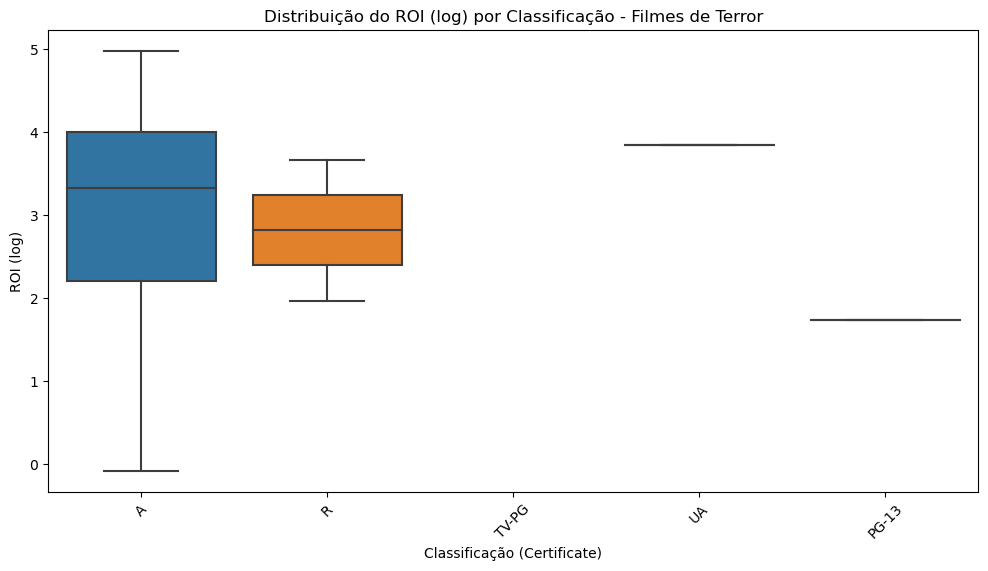

In [54]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]


df_terror = df[df['Main_Genre'] == 'Horror']

plt.figure(figsize=(12,6))
sns.boxplot(x='Certificate', y='ROI_log', data=df_terror)
plt.title("Distribuição do ROI (log) por Classificação - Filmes de Terror")
plt.xlabel("Classificação (Certificate)")
plt.ylabel("ROI (log)")
plt.xticks(rotation=45)
plt.show()

Filmes de classificação A tem maior recompensa mas um maior risco, isso é observado na variabilidade e na mediana, ambas maiores que em R. R representa uma aposta mais segura, mas com um retorno potencial menor nos melhores casos

### 4.3 - Nota VS ROI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


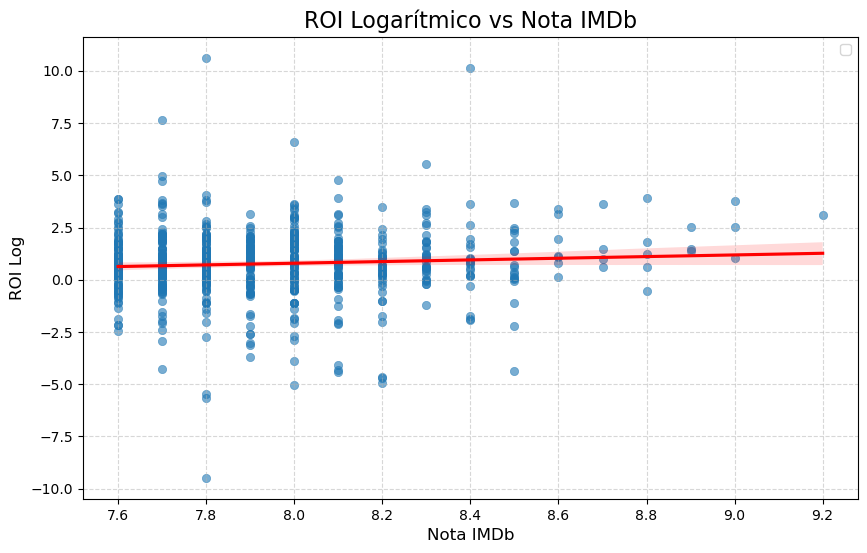

In [70]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='IMDB_Rating', 
    y='ROI_log', 
    data=df, 
    alpha=0.6, 
    edgecolor=None
)

sns.regplot(
    x='IMDB_Rating', 
    y='ROI_log', 
    data=df, 
    scatter=False,   
    color='red', 
    line_kws={'label':'Trendline'}
)

plt.title("ROI Logarítmico vs Nota IMDb", fontsize=16)
plt.xlabel("Nota IMDb", fontsize=12)
plt.ylabel("ROI Log", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

A linha de regressão mostra uma tendência ligeiramente psotiva, ou seja, quanto melhor um filme é avaliado, mais ROI ele terá

Vou realziar um tste de hipótese a partir de uma regressão linear, assim podemos ter certeza se o que foi exibido no gráfico é significativo

- H<sub>0</sub>
: A nota no IMDb não tem efeito significativo sobre o ROI
- H <sub>1</sub>
: A nota no IMDb tem efeito significativo sobre o ROI

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['ROI_log', 'IMDB_Rating'])

X = sm.add_constant(df['IMDB_Rating'])
y = df['ROI_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ROI_log   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.113
Date:                Mon, 01 Sep 2025   Prob (F-statistic):             0.0781
Time:                        16:31:58   Log-Likelihood:                -1288.3
No. Observations:                 667   AIC:                             2581.
Df Residuals:                     665   BIC:                             2590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3874      1.791     -1.333      

Apesar de apresentar uma relação positiva entre a nota e o ROI, não podemos rejeitar H<sub>0</sub> por conta do p-valor > 0.05, ou seja, não é estatisticamente significativo

### 4.4 - Budget VS ROI

Vou realizar uma série de testes de hipótese usando o budget com uma regressão linear contínua a aprtir do log de budget
- H<sub>0</sub>: O orçamento do filme não tem efeito significativo sobre o ROI
- H<sub>1</sub>: O orçamento do filme tem efeito significativo sobre o ROI

In [ ]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['ROI_log', 'budget'])

df_clean['budget_log'] = np.log1p(df_clean['budget'])

X = sm.add_constant(df_clean['budget_log'])
y = df_clean['ROI_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ROI_log   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.44
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           8.32e-20
Time:                        17:14:27   Log-Likelihood:                -1248.2
No. Observations:                 667   AIC:                             2500.
Df Residuals:                     665   BIC:                             2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6218      0.519     10.822      0.0

Com o p-valor baixo, <0.001, rejeitamos a hipótese nula, ou seja, existe efeito do budget no ROI. O coeficiente de budget_log é negativo, ou seja, um budget menor permite um ROI maior
Apesar da maioria das produções muito cara do cinema darem lucros recorde, são as produções baratas que conseguem emplacar em termos proporcionais

### 4.5  Budget vs Nota

Por fim, quero entender como o budget pode acabar afetando a nota, já que é um fator que já vimos que impacta no ROI
Para isso vou utilizar o mesmo teste acima
- H<sub>0</sub>: O orçamento do filme não tem efeito significativo sobre a nota
- H<sub>1</sub>: O orçamento do filme tem efeito significativo sobre a nota


In [ ]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['IMDB_Rating', 'budget'])

df_clean['budget_log'] = np.log1p(df_clean['budget'])

X = sm.add_constant(df_clean['budget_log'])
y = df_clean['IMDB_Rating']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.062
Date:                Mon, 01 Sep 2025   Prob (F-statistic):             0.0806
Time:                        17:20:07   Log-Likelihood:                -113.40
No. Observations:                 667   AIC:                             230.8
Df Residuals:                     665   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1115      0.095     85.585      0.0

Com o p-valor > 0.05, a hipótese nula não é rejeitada, logo não existe uma relação sinificativa entre o orçamento do filme e sua nota no IMDB

## 5 - Mapa de Correlação

Nessa etapa vou utilizar um mapa de correlação. A ideia aqui é ver se exitem fatores como multicolinearidade, e explorar mais diretamente a influência de uma variável em outra

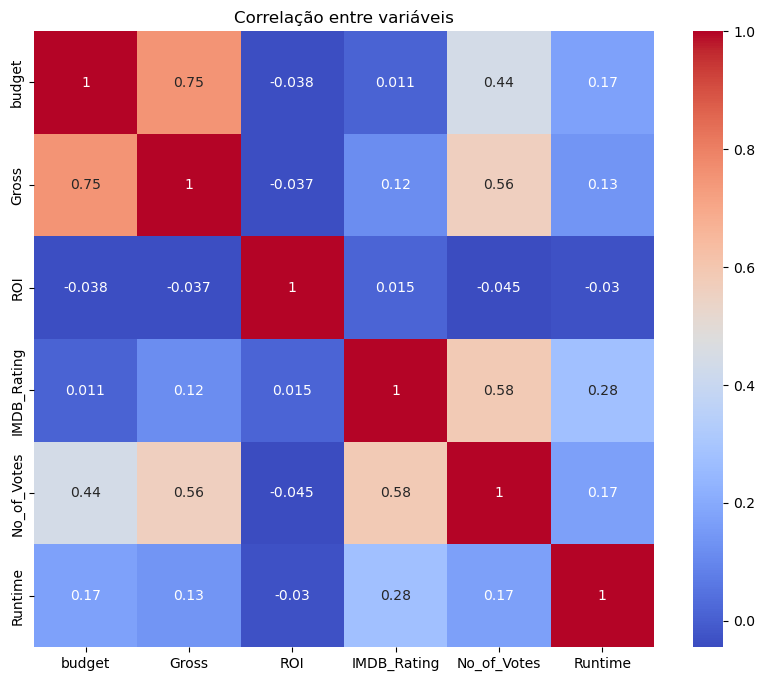

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['budget','Gross','ROI','IMDB_Rating','No_of_Votes','Runtime']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis")
plt.show()

Os key-takeaways aqui foram:
- Forte relação orçamento-receita: Um correlação positiva de 0.75, ou seja, filmes que investe muito tendem a ter um alto faturamento, mas não implica lucro
- A popularidade, aqui medida pelo número de votos, é um fator essencial para o sucesso de bilheteria
- Paradoxo do ROI: Não há uma relação linear entre o quanto é investido, nem em quanto se arrecada e o ROI
- Multicolinearidade em variaveis como Budget e Gross, e tambpem em No_of_Votes, Gross e IMDB_Rating
- Por conta da multicolinearidade, talves seja interessante usar modelos como Lasso e Ridge para regularizar
- Prever o ROI com essas variáveis seria ineficaz, sendo necessário um feature engineering e talvez modelos complexos de Machine Learning que lidem bem com poucos dados


## 6 - Conclusão

- O lançamento dos filmes podem ser mais lucrativos em períodos de férias, mas também enfrentam mais competição
- A semana de lançamento tem pouca influência, mas vale pegar uma semana com feriados, especialmente se forem prolongados
- Terror, Western e Family são bons generos para lançar filmes, especialmente com baixo orçamento visando um alto ROI
- Filmes de Terror tem uma performance mais segura em classificações R
- A nota tem uma influência relativamente baixa, fatores de valor de produção muito altos talvez não valham o investimento
- Não há evidências de que m maior investimento nos filmes resulta em uma melhor avaliação do público
- Investimento no Marketing para melhorar o ROI é uma estratégia viável e que pode apresentar baixo custo